# Analisis de Cámbio de Temperaturas (1961 - 2019)
### Manuel Andrés Cota Santeliz

El cambio en la temperatura durante las últimas décadas es un problema alarmante en el mundo entero. Sin embargo, enfocarnos en el cambio de temperatura de nuestro pais nos ayuda a darnos una idea de la magnitud del problema y nos hace recordar que somos victimas de las consecuencias.

Los datos utilizados se extrajeron de Kaggle y pueden revisarse [aquí](https://www.kaggle.com/datasets/sevgisarac/temperature-change?resource=download). Incluye datos del cámbio de temperatura de distintos paises y áreas de todo el mundo.

### Preparación

Primero, instalamos e importamos als librerias y dependencias necesarias para la extracción, procesamiento y análisis de los datos.

In [98]:
# Instalamos librerias que necesitaremos.
!pip install mysql-connector-python
!pip install sqlalchemy

In [99]:
# Importamos las dependencias necesarias.
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import urllib.request
import zipfile

Ahora, preparamos las funciones que seran llamadas para cada conexión a la base de datos. Para más información respecto a la base de datos, puede revisar el README en el repositorio de [GitHub](https://github.com/MaAnCoSa/cambio_temp_mexico).

In [100]:
# Preparamos la función de conexión a la base de datos.
def connect_to_db():
    return mysql.connector.connect(
        host="127.0.0.1",
        port=3306,
        user="root",
        password="1234",
        database="temp"
    )

In [101]:
# Preparamos la función para hacer consultas a la base de datos.
def query_db(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    connection.close()
    return df

### Limpieza y Procesamiento

Ahora, podemos comenzar probando la conexión a la base de datos llamando a la tabla completa.

In [102]:
# Probamos consultando la tabla completa de temperaturas.
query = "SELECT * FROM temp_change"

query_db(query)

,Area Code,Area,months Code,Months,Element Code,Element,Unit,y1961,y1962,y1963,...,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
0,2,Afghanistan,7001,January,7271,Temperature change,�C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,�C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,�C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,�C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,�C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun�Jul�Aug,6078,Standard Deviation,�C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep�Oct�Nov,7271,Temperature change,�C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep�Oct�Nov,6078,Standard Deviation,�C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,�C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


Tenemos 9656 registros de distintos paises y áreas del mundo entero. Hagamos entonces el filtrado a solo los datos de México. Adicionalmente, como se puede ver en la columna "Element", no solo tenemos los datos del cámbio de temperatura, sino también la desviación estandar. Ya que no nos interesa ese estadístico por ahora, también lo filtraremos.

In [103]:
# Intentemos filtrar a solo los datos de México.
query = '''
    SELECT *
    FROM temp.temp_change tc
    WHERE Area = "Mexico"
        AND Element = "Temperature Change"
'''

mexico_df = query_db(query)
mexico_df

,Area Code,Area,months Code,Months,Element Code,Element,Unit,y1961,y1962,y1963,...,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
0,138,Mexico,7001,January,7271,Temperature change,�C,-0.310,-0.818,-0.303,...,-0.007,0.439,1.459,0.545,0.587,0.742,0.363,1.741,0.457,1.052
1,138,Mexico,7002,February,7271,Temperature change,�C,-0.170,1.534,-0.082,...,-0.677,0.278,0.964,1.356,2.209,1.156,1.866,2.718,2.566,2.001
2,138,Mexico,7003,March,7271,Temperature change,�C,0.204,-0.848,0.623,...,-0.354,1.822,1.160,0.834,1.179,0.488,1.693,2.274,2.047,1.168
3,138,Mexico,7004,April,7271,Temperature change,�C,0.206,0.028,0.951,...,0.298,2.078,1.060,0.764,1.151,1.096,1.175,1.347,1.221,0.874
4,138,Mexico,7005,May,7271,Temperature change,�C,0.672,-0.083,0.511,...,0.839,1.280,1.272,0.548,0.278,0.195,1.204,1.065,1.527,0.887
5,138,Mexico,7006,June,7271,Temperature change,�C,-0.095,-0.172,0.098,...,1.187,1.262,1.078,1.136,0.992,0.693,0.889,1.253,1.130,1.251
6,138,Mexico,7007,July,7271,Temperature change,�C,-0.428,0.168,0.114,...,0.243,0.763,0.313,0.272,0.648,0.875,1.484,0.847,1.236,1.343
7,138,Mexico,7008,August,7271,Temperature change,�C,-0.197,0.801,0.132,...,1.017,1.582,0.908,0.589,0.674,1.648,0.653,1.070,1.072,2.171
8,138,Mexico,7009,September,7271,Temperature change,�C,-0.134,0.387,0.309,...,0.794,1.133,0.579,0.198,0.528,1.512,0.814,0.809,1.050,1.354
9,138,Mexico,7010,October,7271,Temperature change,�C,-0.020,0.848,0.227,...,0.138,0.739,1.055,0.810,1.297,1.740,1.946,1.346,0.540,1.274


Buscamos graficar el cambio de temperatura de cada mes con respecto al tiempo, ya que nos mostrará si ha habido una tendencia notable a aumentar a lo largo de los años. Por ello, muchas columnas, como "Area", "Element" o "Unit", no seran necesarias.

Las columnas que denotan cada año llevan la inicial "Y" (por "year", año en ingles), pero nos conviene por practicidad no tener esa sigla incliuda en el nombre de cada columna.

In [104]:
mexico_df.drop(columns=['Area Code', 'Area', 'months Code', 'Element Code', 'Element', 'Unit'], inplace=True)
mexico_df.rename(columns={ x: x[1:] for x in mexico_df.columns if 'y' in x}, inplace=True)

Hecho esto, nuestros datos comienzan a verse mucho más limpios.

In [105]:
mexico_df

,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,-0.310,-0.818,-0.303,-1.045,0.494,-1.335,-0.672,-0.223,1.017,...,-0.007,0.439,1.459,0.545,0.587,0.742,0.363,1.741,0.457,1.052
1,February,-0.170,1.534,-0.082,-1.050,-0.897,-1.391,-0.173,-0.335,0.266,...,-0.677,0.278,0.964,1.356,2.209,1.156,1.866,2.718,2.566,2.001
2,March,0.204,-0.848,0.623,-0.362,-0.892,-0.508,0.770,-1.575,-1.328,...,-0.354,1.822,1.160,0.834,1.179,0.488,1.693,2.274,2.047,1.168
3,April,0.206,0.028,0.951,0.392,0.396,-0.013,0.332,-0.548,0.432,...,0.298,2.078,1.060,0.764,1.151,1.096,1.175,1.347,1.221,0.874
4,May,0.672,-0.083,0.511,0.196,-0.058,0.193,0.198,-0.145,0.045,...,0.839,1.280,1.272,0.548,0.278,0.195,1.204,1.065,1.527,0.887
5,June,-0.095,-0.172,0.098,-0.638,-0.485,-0.202,-0.195,-0.295,0.313,...,1.187,1.262,1.078,1.136,0.992,0.693,0.889,1.253,1.130,1.251
6,July,-0.428,0.168,0.114,0.152,-0.029,0.245,0.155,-0.585,0.731,...,0.243,0.763,0.313,0.272,0.648,0.875,1.484,0.847,1.236,1.343
7,August,-0.197,0.801,0.132,0.170,-0.261,-0.038,-0.220,-0.528,0.563,...,1.017,1.582,0.908,0.589,0.674,1.648,0.653,1.070,1.072,2.171
8,September,-0.134,0.387,0.309,0.008,0.006,0.078,-0.713,-0.476,0.217,...,0.794,1.133,0.579,0.198,0.528,1.512,0.814,0.809,1.050,1.354
9,October,-0.020,0.848,0.227,-0.566,-0.491,-0.429,-0.433,0.438,0.163,...,0.138,0.739,1.055,0.810,1.297,1.740,1.946,1.346,0.540,1.274


Ahora, podemos notar que hay datos que no cubren un solo mes. En lugar de ello, parecen ser mediciones calculadas por temporadas o incluso una medicion general del año meteorológico. Ya que no entran dentro del objetivo de este análisis, retiramos esos valores.

In [106]:
ignore_cols = ['Dec�Jan�Feb', 'Mar�Apr�May','Jun�Jul�Aug','Sep�Oct�Nov','Meteorological year']
mexico_df = mexico_df[~mexico_df['Months'].isin(ignore_cols)]

In [107]:
mexico_df

,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,-0.310,-0.818,-0.303,-1.045,0.494,-1.335,-0.672,-0.223,1.017,...,-0.007,0.439,1.459,0.545,0.587,0.742,0.363,1.741,0.457,1.052
1,February,-0.170,1.534,-0.082,-1.050,-0.897,-1.391,-0.173,-0.335,0.266,...,-0.677,0.278,0.964,1.356,2.209,1.156,1.866,2.718,2.566,2.001
2,March,0.204,-0.848,0.623,-0.362,-0.892,-0.508,0.770,-1.575,-1.328,...,-0.354,1.822,1.160,0.834,1.179,0.488,1.693,2.274,2.047,1.168
3,April,0.206,0.028,0.951,0.392,0.396,-0.013,0.332,-0.548,0.432,...,0.298,2.078,1.060,0.764,1.151,1.096,1.175,1.347,1.221,0.874
4,May,0.672,-0.083,0.511,0.196,-0.058,0.193,0.198,-0.145,0.045,...,0.839,1.280,1.272,0.548,0.278,0.195,1.204,1.065,1.527,0.887
5,June,-0.095,-0.172,0.098,-0.638,-0.485,-0.202,-0.195,-0.295,0.313,...,1.187,1.262,1.078,1.136,0.992,0.693,0.889,1.253,1.130,1.251
6,July,-0.428,0.168,0.114,0.152,-0.029,0.245,0.155,-0.585,0.731,...,0.243,0.763,0.313,0.272,0.648,0.875,1.484,0.847,1.236,1.343
7,August,-0.197,0.801,0.132,0.170,-0.261,-0.038,-0.220,-0.528,0.563,...,1.017,1.582,0.908,0.589,0.674,1.648,0.653,1.070,1.072,2.171
8,September,-0.134,0.387,0.309,0.008,0.006,0.078,-0.713,-0.476,0.217,...,0.794,1.133,0.579,0.198,0.528,1.512,0.814,0.809,1.050,1.354
9,October,-0.020,0.848,0.227,-0.566,-0.491,-0.429,-0.433,0.438,0.163,...,0.138,0.739,1.055,0.810,1.297,1.740,1.946,1.346,0.540,1.274


Contamos entonces con los datos por año y por cada mes. Lo que resta es darle a nuestros datos la forma adecuada para graficarlos. Primeramente, nos conviene que los meses sean las columnas, ya que son muchos menos que la actual cantidad de columnas.

In [108]:
mexico_df_T = mexico_df.transpose()
mexico_df_T

,0,1,2,3,4,5,6,7,8,9,10,11
Months,January,February,March,April,May,June,July,August,September,October,November,December
1961,-0.31,-0.17,0.204,0.206,0.672,-0.095,-0.428,-0.197,-0.134,-0.02,-0.538,0.182
1962,-0.818,1.534,-0.848,0.028,-0.083,-0.172,0.168,0.801,0.387,0.848,0.237,0.12
1963,-0.303,-0.082,0.623,0.951,0.511,0.098,0.114,0.132,0.309,0.227,0.045,-0.884
1964,-1.045,-1.05,-0.362,0.392,0.196,-0.638,0.152,0.17,0.008,-0.566,0.13,-0.083
1965,0.494,-0.897,-0.892,0.396,-0.058,-0.485,-0.029,-0.261,0.006,-0.491,1.424,0.344
1966,-1.335,-1.391,-0.508,-0.013,0.193,-0.202,0.245,-0.038,0.078,-0.429,0.032,-0.735
1967,-0.672,-0.173,0.77,0.332,0.198,-0.195,0.155,-0.22,-0.713,-0.433,0.389,-0.358
1968,-0.223,-0.335,-1.575,-0.548,-0.145,-0.295,-0.585,-0.528,-0.476,0.438,-0.423,-0.178
1969,1.017,0.266,-1.328,0.432,0.045,0.313,0.731,0.563,0.217,0.163,-0.11,0.025


Para graficar, queremos utilizar la fecha como variable independiente. Por ello, debemos colocar todos los datos a manera de lista segun su año y su mes.

In [109]:
# Desglozamos los datos a una medición por renglón con su año y mes correspondientes.
date_df = mexico_df.melt(id_vars='Months', var_name='Year', value_name='CambioTemp')
# Generamos una nueva columna que almacene el año y el mes en el formato de fecha.
date_df['Date'] = pd.to_datetime(date_df['Year'] + '-' + date_df['Months'], format='%Y-%B')
# Establecemos esa columna de fecha como el índice del DataFrame.
date_df.set_index('Date', inplace=True)
# Ordenamos los datos segun la fecha.
date_df.sort_index(inplace=True)

date_df

,Months,Year,CambioTemp
Date,,,
1961-01-01,January,1961,-0.310
1961-02-01,February,1961,-0.170
1961-03-01,March,1961,0.204
1961-04-01,April,1961,0.206
1961-05-01,May,1961,0.672
...,...,...,...
2019-08-01,August,2019,2.171
2019-09-01,September,2019,1.354
2019-10-01,October,2019,1.274


Finalmente, contamos con datos de cambio de temperatura ordenados por su fecha. Podemos entonces pensar en graficarlos.

### Graficas y Visualización

Tenemos 12 meses con sus datos de los ultimos 60 años. podemos graficar las mediciones de un mes en cada año que se tenga registro para ver si, bajo las condiciones anuales más similares posibles, la temperatura ha tenido un cambio drástico.

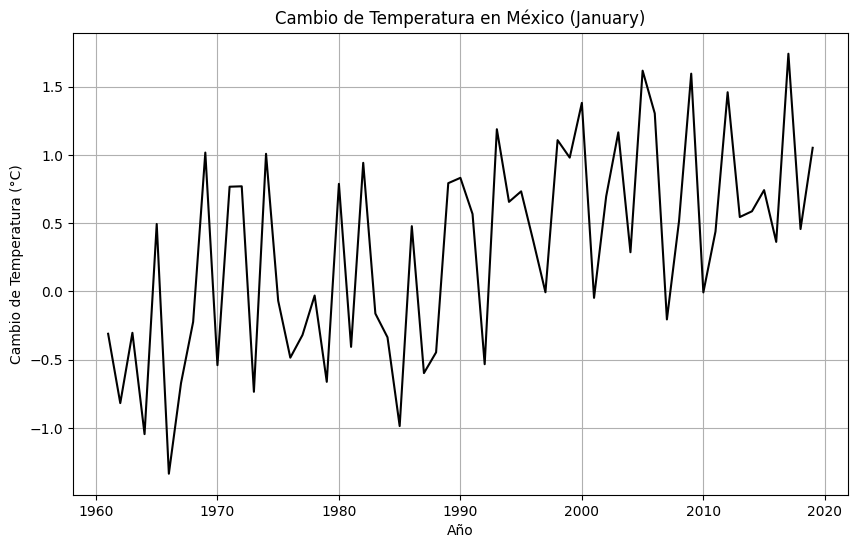

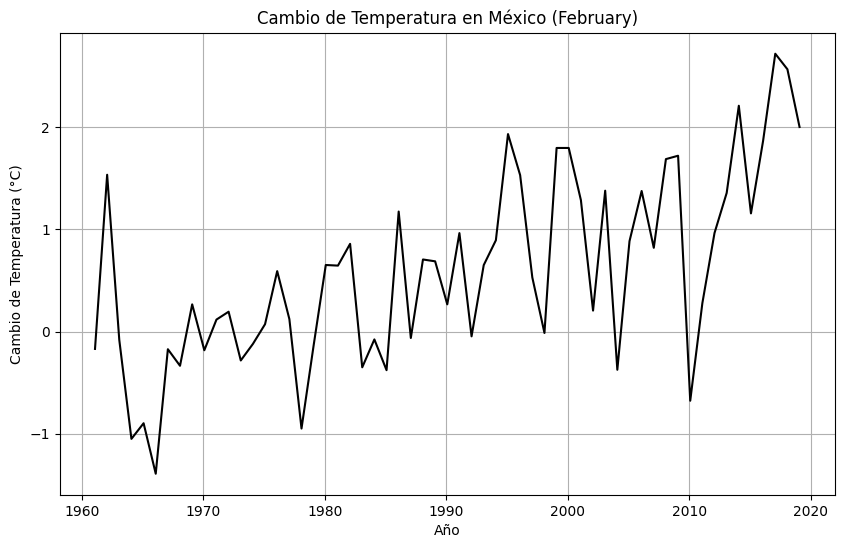

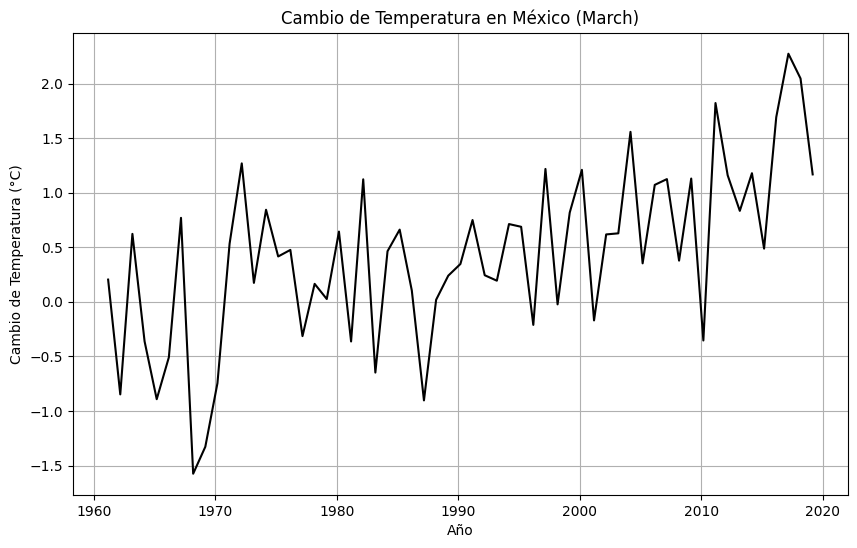

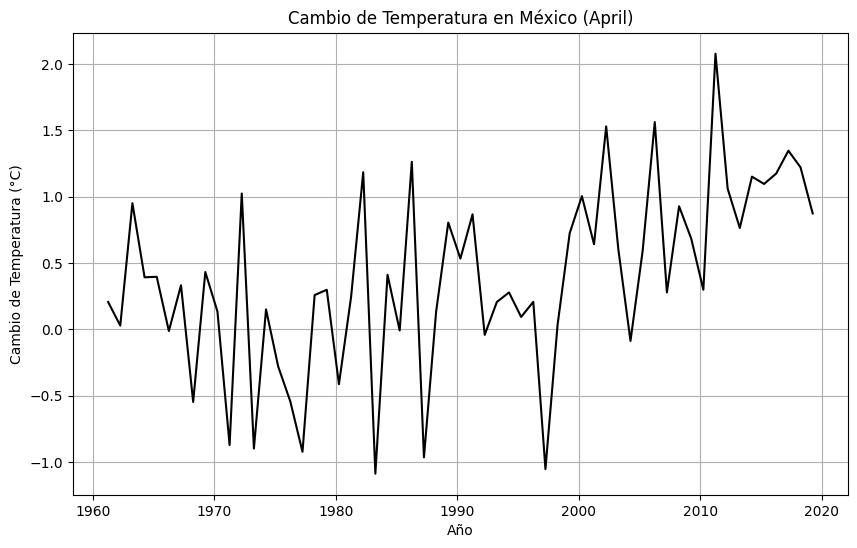

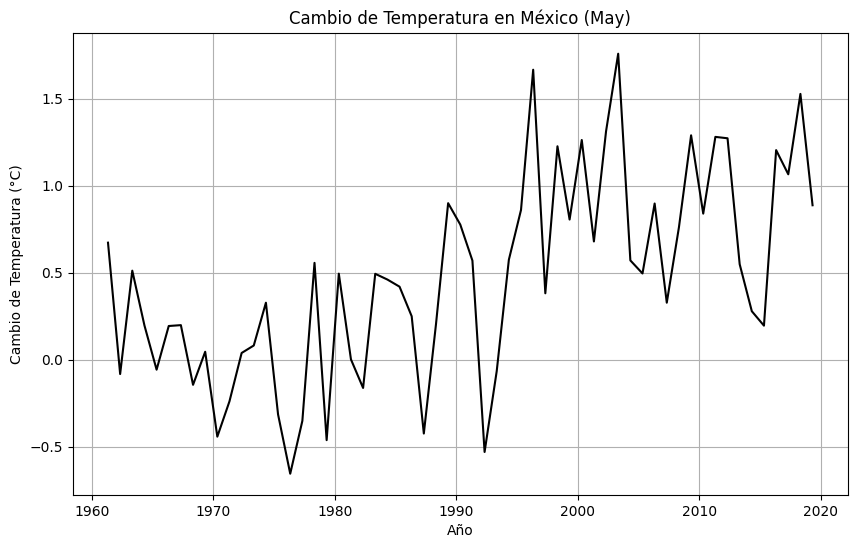

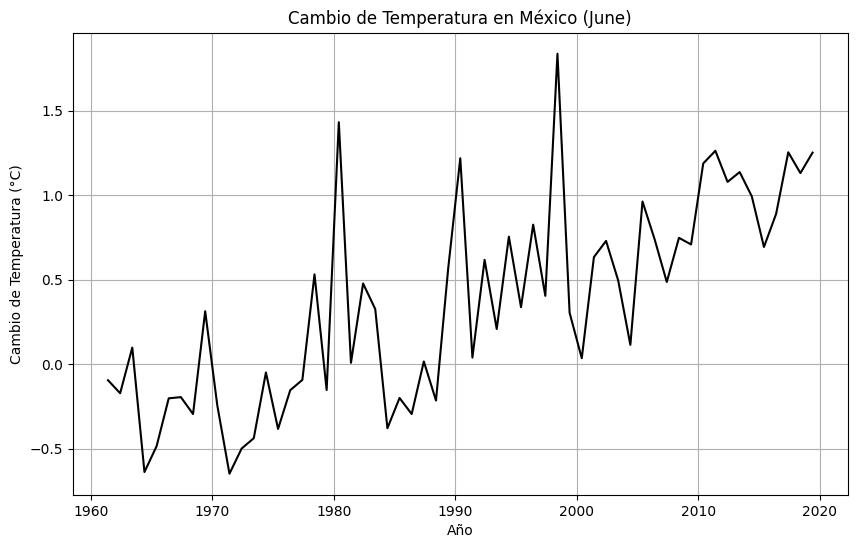

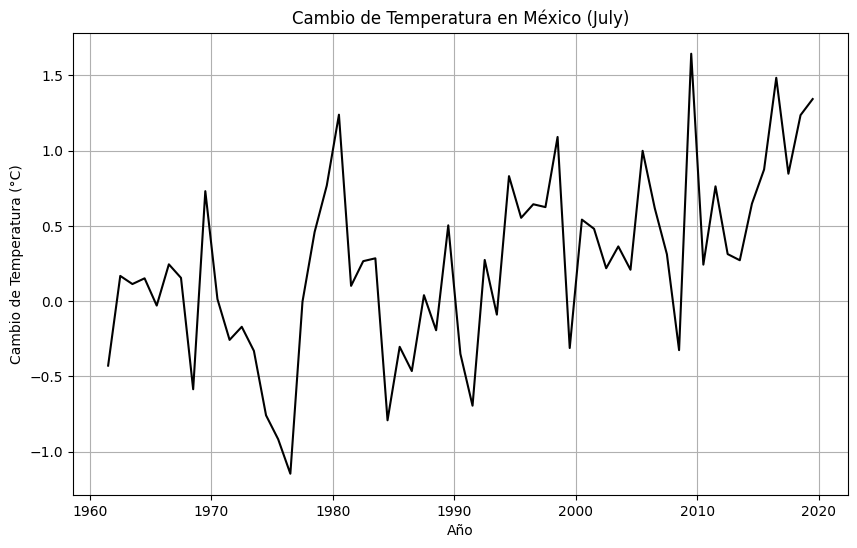

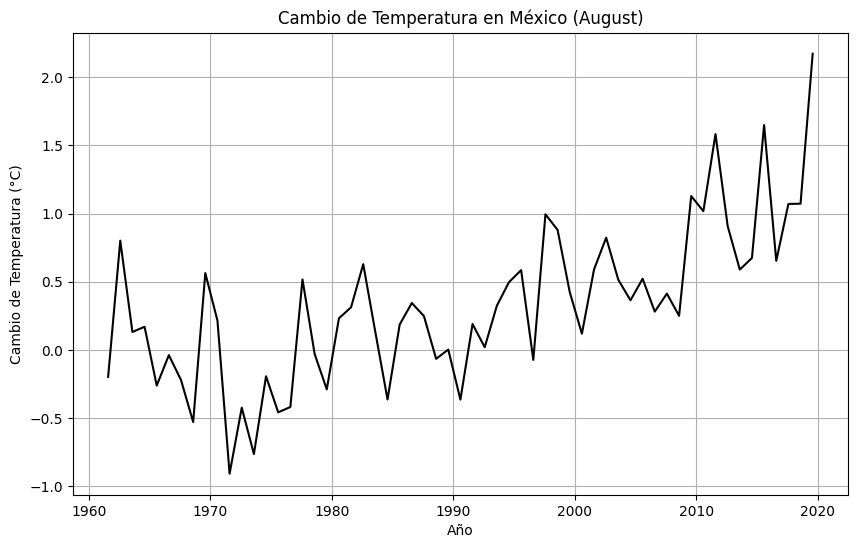

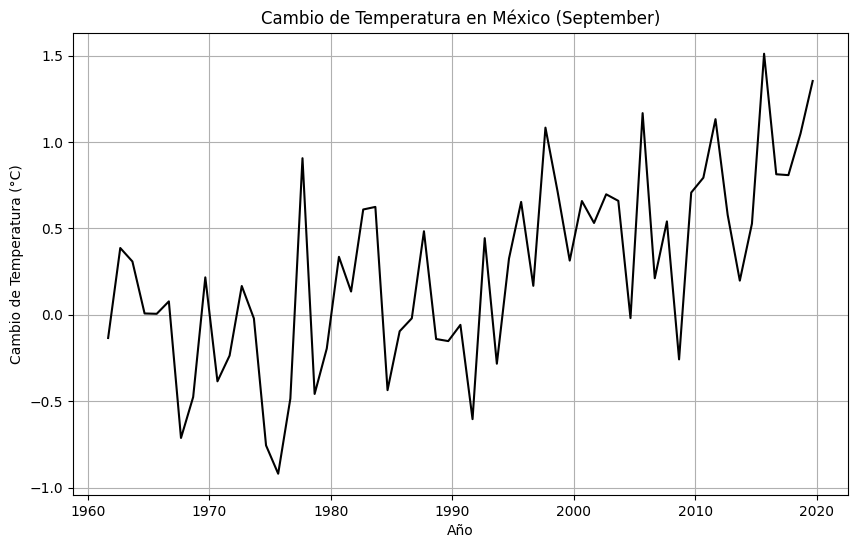

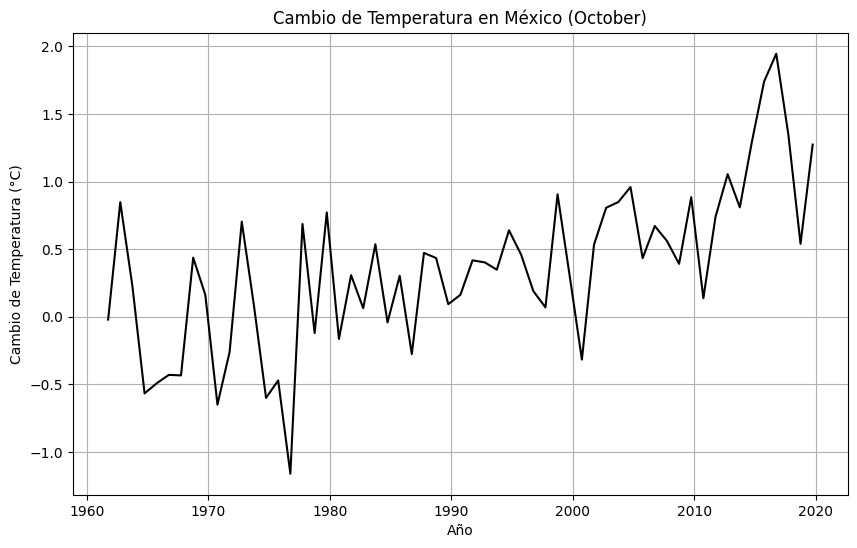

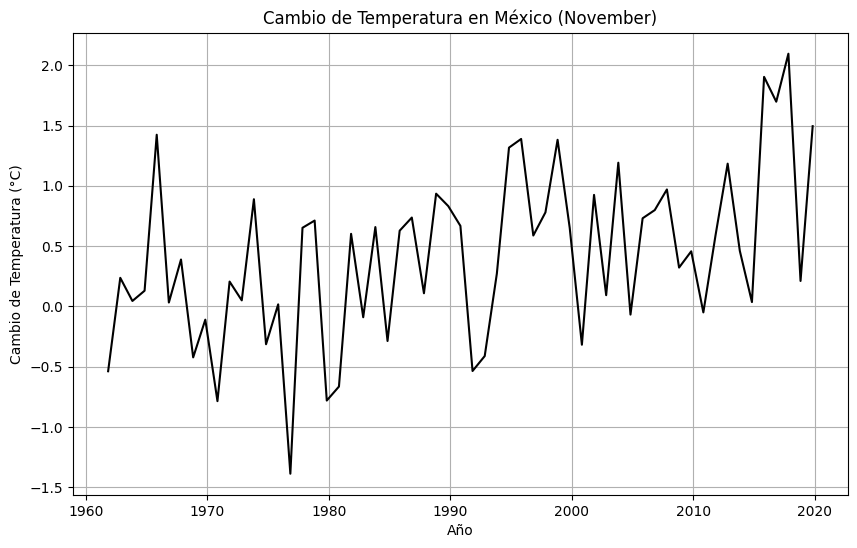

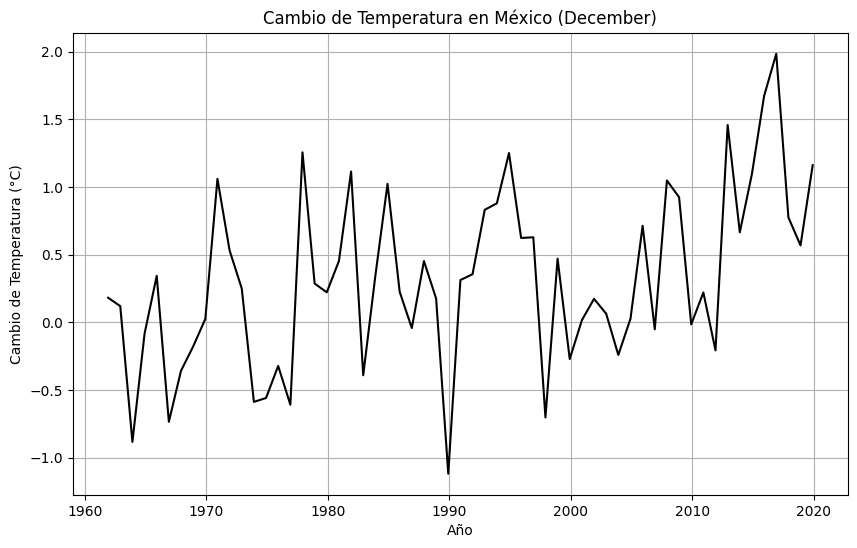

In [110]:
# Preparamos la función para graficar los cambios de temperatura en un mes dado.
def plot_month_temp(month_data, month):
    # Establecemos un tamaño grande par la gráfica.
    plt.figure(figsize=(10, 6))
    # Agregamos los datos.
    plt.plot(month_data.index, month_data.values, color='black')
    plt.title(f'Cambio de Temperatura en México ({month})')   # Título
    # Agregamos etiquetas a los ejes.
    plt.xlabel('Año')
    plt.ylabel('Cambio de Temperatura (°C)')
    # Agregamos la cuadrícula.
    plt.grid(True)
    # Mostramos la gráfica generada.
    plt.show()

# Usamos la función de graficar para cada mes.
for mes in date_df['Months'].unique():
    datos_mes = date_df[date_df['Months'] == mes]['CambioTemp']
    plot_month_temp(datos_mes, mes)

### Conclusiones

Analizando casi cualquier mes, podemos darnos cuenta de que la temperatura en México ha aumentado notablemente a lo largo de los últimos 60 años. Sería recomendable encontrar mediciones de la temperatura en México que sean mucho más precisas en cuanto a estados o incluso municipios.